<a href="https://colab.research.google.com/github/Sameera326/EXPLAINABLE-AI-Assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!
Shape: (162, 13)
   number_of_peak  Age  Length_of_cycle  Estimated_day_of_ovulution  \
0               3   18               27                          14   
1               4   18               25                          17   
2               2   19               30                          17   
3               3   19               28                          16   
4               2   19               35                          18   

   Length_of_Leutal_Phase  Length_of_menses Unusual_Bleeding Height  Weight  \
0                       9                 5               no    5 6    76.0   
1                      10                 6              yes    5 6    76.0   
2                      13                 4               no    5 3    56.0   
3                      14                 6               no    5 1    61.0   
4                      15                 5               no    5'3    55.0   

   Income   BMI  Mean_of_length_of_cycle  Menses_s

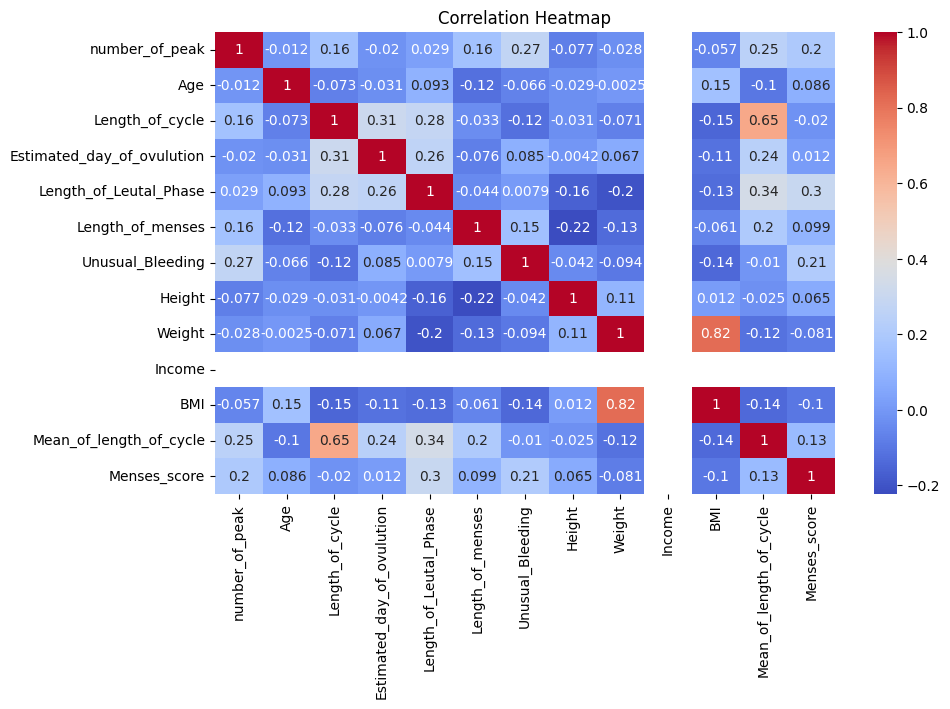

Dropped correlated columns: [] 

Train shape: (129, 12) Test shape: (33, 12) 

📊 Linear Regression Results:
Mean Squared Error: 1.146 | R2 Score: -0.025 | Approx Accuracy: 0.00%

📊 Random Forest Regressor Results:
Mean Squared Error: 0.241 | R2 Score: 0.784 | Approx Accuracy: 78.44%

📊 K-Nearest Neighbors Regressor Results:
Mean Squared Error: 0.943 | R2 Score: 0.157 | Approx Accuracy: 15.67%

📊 Support Vector Regressor Results:
Mean Squared Error: 0.695 | R2 Score: 0.379 | Approx Accuracy: 37.88%

🔹 Final Model Comparison:

                           Model  Mean Squared Error  R2 Score  \
0              Linear Regression            1.145904 -0.024540   
1        Random Forest Regressor            0.241195  0.784351   
2  K-Nearest Neighbors Regressor            0.943224  0.156674   
3       Support Vector Regressor            0.694823  0.378767   

   Approx Accuracy (%)  
0                 0.00  
1                78.44  
2                15.67  
3                37.88  


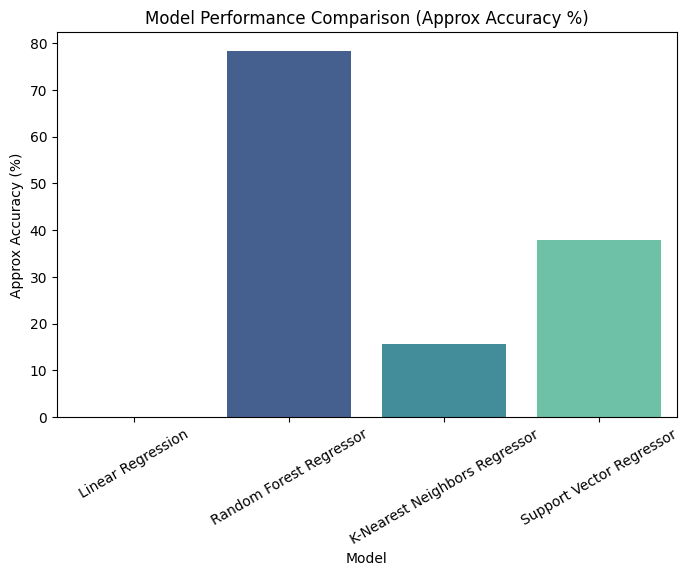

In [38]:
# ======================================
# 📘 PERIOD DATASET ANALYSIS + REGRESSION MODELS
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# 1️⃣ LOAD THE DATASET
# ===============================
file_path = "/content/period - Copy.csv" # Corrected file path
data = pd.read_csv("/content/period - Copy.csv") # Added quotes around the file path
print("✅ Dataset Loaded Successfully!")
print("Shape:", data.shape)
print(data.head(), "\n")

# ===============================
# 2️⃣ MISSING VALUE CHECK
# ===============================
print("Missing values per column:\n", data.isnull().sum(), "\n")

# ===============================
# 3️⃣ DATA CLEANING
# ===============================

# Handle Height (convert to inches or numeric)
data['Height'] = data['Height'].astype(str)
data['Height'] = data['Height'].str.replace("'", " ").str.replace('"', " ") # Corrected quoting for replace
data['Height'] = data['Height'].str.extract('(\d+)').astype(float)

# Replace 'Unusual_Bleeding' categorical with numeric
data['Unusual_Bleeding'] = data['Unusual_Bleeding'].map({'no': 0, 'yes': 1})

# Re-handle missing values (if any left)
data.fillna(data.median(numeric_only=True), inplace=True)
print("✅ Data cleaned successfully!\n")

# ===============================
# 4️⃣ CORRELATION ANALYSIS
# ===============================
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Drop highly correlated columns (>0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data.drop(columns=to_drop, inplace=True)
print("Dropped correlated columns:", to_drop, "\n")

# ===============================
# 5️⃣ FEATURE SELECTION & SPLIT
# ===============================
target = 'Menses_score'
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape, "\n")

# ===============================
# 6️⃣ NORMALIZATION
# ===============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# 7️⃣ MODEL TRAINING & EVALUATION
# ===============================
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

results = {"Model": [], "Mean Squared Error": [], "R2 Score": [], "Approx Accuracy (%)": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    approx_acc = max(0, r2) * 100  # treat negative R² as 0%

    results["Model"].append(name)
    results["Mean Squared Error"].append(mse)
    results["R2 Score"].append(r2)
    results["Approx Accuracy (%)"].append(round(approx_acc, 2))

    print(f"📊 {name} Results:")
    print(f"Mean Squared Error: {mse:.3f} | R2 Score: {r2:.3f} | Approx Accuracy: {approx_acc:.2f}%\n")

# ===============================
# 8️⃣ FINAL MODEL COMPARISON
# ===============================
result_df = pd.DataFrame(results)
print("🔹 Final Model Comparison:\n")
print(result_df)

# ===============================
# 9️⃣ VISUALIZE COMPARISON
# ===============================
plt.figure(figsize=(8,5))
sns.barplot(data=result_df, x="Model", y="Approx Accuracy (%)", palette="mako")
plt.title("Model Performance Comparison (Approx Accuracy %)")
plt.xticks(rotation=30)
plt.show()